# House Price Prediction- Machine Learning

Created by- Kavya Anil

# Importing Required Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import scipy.stats as stats
import pickle

# Importing dataset

In [2]:
df= pd.read_csv("housing_prices.csv")
df_copy = df.copy()
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


The dataset (csv file) is imported.

# Checking for missing values

In [3]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

There are no missing values.

# Implementation without pipeline:

First, the models are implemented without pipeline so hyperparameter tuning can be done easily to understand which model works best.

# Encoding

In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


The column 'furnishingstatus' has the furnishing status of the house in categorical ordinal values. Hence, Ordinal Encoding is used for the column.

In [5]:
df['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [6]:
encoder=OrdinalEncoder(categories=[['furnished','semi-furnished','unfurnished']])
df['furnishingstatus']=encoder.fit_transform(df[['furnishingstatus']])
df['furnishingstatus'].unique()

array([0., 1., 2.])

The column 'mainroad' has values 'yes' and 'no'. Hence, One Hot Encoding is used for the column.

In [7]:
df['mainroad'].unique()

array(['yes', 'no'], dtype=object)

In [8]:
ohe=OneHotEncoder(sparse_output=False) 
data=ohe.fit_transform(df[['mainroad']])
ef=pd.DataFrame(data,columns=['mainroad_no','mainroad_yes'])
df=df.join(ef)
df=df.drop(['mainroad'],axis=1)

The column 'guestroom' has values 'yes' and 'no'. Hence, One Hot Encoding is used for the column.

In [9]:
df['guestroom'].unique()

array(['no', 'yes'], dtype=object)

In [10]:
ohe=OneHotEncoder(sparse_output=False) 
data=ohe.fit_transform(df[['guestroom']])
ef=pd.DataFrame(data,columns=['guestroom_no','guestroom_yes'])
df=df.join(ef)
df=df.drop(['guestroom'],axis=1)

The column 'basement' has values 'yes' and 'no'. Hence, One Hot Encoding is used for the column.

In [11]:
df['basement'].unique()

array(['no', 'yes'], dtype=object)

In [12]:
ohe=OneHotEncoder(sparse_output=False) 
data=ohe.fit_transform(df[['basement']])
ef=pd.DataFrame(data,columns=['basement_no','basement_yes'])
df=df.join(ef)
df=df.drop(['basement'],axis=1)

The column 'hotwaterheating' has values 'yes' and 'no'. Hence, One Hot Encoding is used for the column.

In [13]:
df['hotwaterheating'].unique()

array(['no', 'yes'], dtype=object)

In [14]:
ohe=OneHotEncoder(sparse_output=False) 
data=ohe.fit_transform(df[['hotwaterheating']])
ef=pd.DataFrame(data,columns=['hotwaterheating_no','hotwaterheating_yes'])
df=df.join(ef)
df=df.drop(['hotwaterheating'],axis=1)

The column 'airconditioning' has values 'yes' and 'no'. Hence, One Hot Encoding is used for the column.

In [15]:
df['airconditioning'].unique()

array(['yes', 'no'], dtype=object)

In [16]:
ohe=OneHotEncoder(sparse_output=False) 
data=ohe.fit_transform(df[['airconditioning']])
ef=pd.DataFrame(data,columns=['airconditioning_no','airconditioning_yes'])
df=df.join(ef)
df=df.drop(['airconditioning'],axis=1)

The column 'prefarea' has values 'yes' and 'no'. Hence, One Hot Encoding is used for the column.

In [17]:
df['prefarea'].unique()

array(['yes', 'no'], dtype=object)

In [18]:
ohe=OneHotEncoder(sparse_output=False) 
data=ohe.fit_transform(df[['prefarea']])
ef=pd.DataFrame(data,columns=['prefarea_no','prefarea_yes'])
df=df.join(ef)
df=df.drop(['prefarea'],axis=1)

In [19]:
df.head()

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
0,13300000,7420,4,2,3,2,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,12250000,8960,4,4,4,3,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,12250000,9960,3,2,2,2,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
3,12215000,7500,4,2,2,3,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
4,11410000,7420,4,1,2,2,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0


# Scaling

Normalization (Normalizer) scales each data sample to have a unit norm, ensuring the length of the vector is 1 but does not alter the data distribution itself.

In [20]:
scaler = Normalizer()

In [21]:
scaled_values = scaler.fit_transform(df)
df = pd.DataFrame(scaled_values, columns=df.columns)

In [22]:
df

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
0,1.000000,0.000558,3.007518e-07,1.503759e-07,2.255639e-07,1.503759e-07,0.000000e+00,0.000000e+00,7.518796e-08,7.518796e-08,0.000000e+00,7.518796e-08,0.000000e+00,7.518796e-08,0.0,0.000000e+00,7.518796e-08,0.000000e+00,7.518796e-08
1,1.000000,0.000731,3.265305e-07,3.265305e-07,3.265305e-07,2.448979e-07,0.000000e+00,0.000000e+00,8.163263e-08,8.163263e-08,0.000000e+00,8.163263e-08,0.000000e+00,8.163263e-08,0.0,0.000000e+00,8.163263e-08,8.163263e-08,0.000000e+00
2,1.000000,0.000813,2.448979e-07,1.632653e-07,1.632653e-07,1.632653e-07,8.163263e-08,0.000000e+00,8.163263e-08,8.163263e-08,0.000000e+00,0.000000e+00,8.163263e-08,8.163263e-08,0.0,8.163263e-08,0.000000e+00,0.000000e+00,8.163263e-08
3,1.000000,0.000614,3.274662e-07,1.637331e-07,1.637331e-07,2.455996e-07,0.000000e+00,0.000000e+00,8.186654e-08,8.186654e-08,0.000000e+00,0.000000e+00,8.186654e-08,8.186654e-08,0.0,0.000000e+00,8.186654e-08,0.000000e+00,8.186654e-08
4,1.000000,0.000650,3.505696e-07,8.764240e-08,1.752848e-07,1.752848e-07,0.000000e+00,0.000000e+00,8.764240e-08,0.000000e+00,8.764240e-08,0.000000e+00,8.764240e-08,8.764240e-08,0.0,0.000000e+00,8.764240e-08,8.764240e-08,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.999999,0.001648,1.098900e-06,5.494498e-07,5.494498e-07,1.098900e-06,1.098900e-06,0.000000e+00,5.494498e-07,5.494498e-07,0.000000e+00,0.000000e+00,5.494498e-07,5.494498e-07,0.0,5.494498e-07,0.000000e+00,5.494498e-07,0.000000e+00
541,0.999999,0.001358,1.697647e-06,5.658824e-07,5.658824e-07,0.000000e+00,5.658824e-07,5.658824e-07,0.000000e+00,5.658824e-07,0.000000e+00,5.658824e-07,0.000000e+00,5.658824e-07,0.0,5.658824e-07,0.000000e+00,5.658824e-07,0.000000e+00
542,0.999998,0.002069,1.142855e-06,5.714273e-07,5.714273e-07,0.000000e+00,1.142855e-06,0.000000e+00,5.714273e-07,5.714273e-07,0.000000e+00,5.714273e-07,0.000000e+00,5.714273e-07,0.0,5.714273e-07,0.000000e+00,5.714273e-07,0.000000e+00
543,0.999999,0.001663,1.714283e-06,5.714278e-07,5.714278e-07,0.000000e+00,0.000000e+00,5.714278e-07,0.000000e+00,5.714278e-07,0.000000e+00,5.714278e-07,0.000000e+00,5.714278e-07,0.0,5.714278e-07,0.000000e+00,5.714278e-07,0.000000e+00


# Train test split

In [23]:
X=df.drop(columns=['price'],axis=1)
y=df['price']

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
X_train

,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
46,0.000797,3.986710e-07,2.657806e-07,5.315613e-07,1.328903e-07,0.000000e+00,0.0,1.328903e-07,1.328903e-07,0.000000e+00,1.328903e-07,0.000000e+00,1.328903e-07,0.000000e+00,0.000000e+00,1.328903e-07,1.328903e-07,0.000000e+00
93,0.001143,4.761902e-07,3.174601e-07,1.587301e-07,4.761902e-07,1.587301e-07,0.0,1.587301e-07,1.587301e-07,0.000000e+00,0.000000e+00,1.587301e-07,1.587301e-07,0.000000e+00,0.000000e+00,1.587301e-07,1.587301e-07,0.000000e+00
335,0.000973,5.102038e-07,2.551019e-07,2.551019e-07,5.102038e-07,0.000000e+00,0.0,2.551019e-07,2.551019e-07,0.000000e+00,0.000000e+00,2.551019e-07,2.551019e-07,0.000000e+00,0.000000e+00,2.551019e-07,2.551019e-07,0.000000e+00
412,0.000761,8.746353e-07,2.915451e-07,5.830902e-07,0.000000e+00,5.830902e-07,0.0,2.915451e-07,2.915451e-07,0.000000e+00,0.000000e+00,2.915451e-07,2.915451e-07,0.000000e+00,2.915451e-07,0.000000e+00,0.000000e+00,2.915451e-07
471,0.001246,9.966770e-07,3.322257e-07,6.644513e-07,0.000000e+00,6.644513e-07,0.0,3.322257e-07,3.322257e-07,0.000000e+00,3.322257e-07,0.000000e+00,3.322257e-07,0.000000e+00,3.322257e-07,0.000000e+00,3.322257e-07,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.000888,5.921537e-07,2.960769e-07,5.921537e-07,0.000000e+00,2.960769e-07,0.0,1.480384e-07,1.480384e-07,0.000000e+00,1.480384e-07,0.000000e+00,1.480384e-07,0.000000e+00,0.000000e+00,1.480384e-07,1.480384e-07,0.000000e+00
106,0.000885,6.493504e-07,3.246752e-07,1.623376e-07,0.000000e+00,1.623376e-07,0.0,1.623376e-07,1.623376e-07,0.000000e+00,0.000000e+00,1.623376e-07,1.623376e-07,0.000000e+00,0.000000e+00,1.623376e-07,0.000000e+00,1.623376e-07
270,0.001037,6.912439e-07,4.608292e-07,6.912439e-07,2.304146e-07,0.000000e+00,0.0,2.304146e-07,2.304146e-07,0.000000e+00,2.304146e-07,0.000000e+00,0.000000e+00,2.304146e-07,2.304146e-07,0.000000e+00,2.304146e-07,0.000000e+00
435,0.001228,6.079023e-07,3.039511e-07,3.039511e-07,0.000000e+00,6.079023e-07,0.0,3.039511e-07,3.039511e-07,0.000000e+00,3.039511e-07,0.000000e+00,3.039511e-07,0.000000e+00,3.039511e-07,0.000000e+00,3.039511e-07,0.000000e+00


In [26]:
y_train

46     1.000000
93     0.999999
335    1.000000
412    1.000000
471    0.999999
         ...   
71     1.000000
106    1.000000
270    0.999999
435    0.999999
102    1.000000
Name: price, Length: 436, dtype: float64

In [27]:
X_test

,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
316,0.001453,9.852206e-07,4.926103e-07,4.926103e-07,2.463052e-07,4.926103e-07,2.463052e-07,0.000000e+00,2.463052e-07,0.000000e+00,0.000000e+00,2.463052e-07,2.463052e-07,0.0,2.463052e-07,0.000000e+00,2.463052e-07,0.000000e+00
77,0.000977,4.511276e-07,3.007517e-07,4.511276e-07,0.000000e+00,0.000000e+00,0.000000e+00,1.503759e-07,1.503759e-07,0.000000e+00,1.503759e-07,0.000000e+00,1.503759e-07,0.0,0.000000e+00,1.503759e-07,0.000000e+00,1.503759e-07
360,0.001089,5.390832e-07,2.695416e-07,2.695416e-07,0.000000e+00,2.695416e-07,0.000000e+00,2.695416e-07,2.695416e-07,0.000000e+00,2.695416e-07,0.000000e+00,2.695416e-07,0.0,2.695416e-07,0.000000e+00,2.695416e-07,0.000000e+00
90,0.000776,4.658384e-07,1.552795e-07,3.105589e-07,0.000000e+00,1.552795e-07,0.000000e+00,1.552795e-07,1.552795e-07,0.000000e+00,1.552795e-07,0.000000e+00,1.552795e-07,0.0,0.000000e+00,1.552795e-07,1.552795e-07,0.000000e+00
493,0.001414,1.071427e-06,3.571425e-07,3.571425e-07,0.000000e+00,0.000000e+00,0.000000e+00,3.571425e-07,3.571425e-07,0.000000e+00,3.571425e-07,0.000000e+00,3.571425e-07,0.0,3.571425e-07,0.000000e+00,3.571425e-07,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,0.000659,4.395603e-07,1.098901e-07,2.197802e-07,2.197802e-07,1.098901e-07,0.000000e+00,1.098901e-07,1.098901e-07,0.000000e+00,0.000000e+00,1.098901e-07,1.098901e-07,0.0,1.098901e-07,0.000000e+00,1.098901e-07,0.000000e+00
357,0.001837,1.060163e-06,2.650406e-07,5.300813e-07,2.650406e-07,0.000000e+00,2.650406e-07,0.000000e+00,2.650406e-07,0.000000e+00,2.650406e-07,0.000000e+00,2.650406e-07,0.0,2.650406e-07,0.000000e+00,2.650406e-07,0.000000e+00
39,0.000759,5.056889e-07,2.528444e-07,5.056889e-07,1.264222e-07,1.264222e-07,0.000000e+00,1.264222e-07,1.264222e-07,0.000000e+00,1.264222e-07,0.000000e+00,1.264222e-07,0.0,0.000000e+00,1.264222e-07,1.264222e-07,0.000000e+00
54,0.000816,4.081631e-07,2.721088e-07,2.721088e-07,1.360544e-07,1.360544e-07,0.000000e+00,1.360544e-07,0.000000e+00,1.360544e-07,1.360544e-07,0.000000e+00,1.360544e-07,0.0,0.000000e+00,1.360544e-07,1.360544e-07,0.000000e+00


In [28]:
y_test

316    0.999999
77     1.000000
360    0.999999
90     1.000000
493    0.999999
         ...   
15     1.000000
357    0.999998
39     1.000000
54     1.000000
155    0.999999
Name: price, Length: 109, dtype: float64

The dependent variables and the independent variable are taken into different dataframes and the data is split for training and testing.

# Model implementation

Here, 5 regression models are implemented along with hyperparameter tuning for each model.

# 1. Linear Regression

In [29]:
linr = LinearRegression()

In [30]:
linr.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred = linr.predict(X_test)
residuals= y_test-y_pred

In [32]:
mse_lr = mean_squared_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)
mae_lr = mean_absolute_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
print("Mean Absolute Error:", mae_lr)
print("Mean Squared Error:", mse_lr)
print("Root Mean Squared Error:", rmse_lr)
print("R2 Score:",r2_lr)

Mean Absolute Error: 1.1568272289230944e-07
Mean Squared Error: 2.1200323405637688e-14
Root Mean Squared Error: 1.4560330836089436e-07
R2 Score: 0.9475503332966599


# Hyperparameter tuning (GridSearchCV)

In [33]:
params = {}  # there are no hyperparameters for Linear Regression
grid_search = GridSearchCV(linr, params, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(), param_grid={})

In [34]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [35]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R2 Score:",r2)

Mean Absolute Error: 1.1568272289230944e-07
Mean Squared Error: 2.1200323405637688e-14
Root Mean Squared Error: 1.4560330836089436e-07
R2 Score: 0.9475503332966599


In [36]:
grid_search.best_params_

{}

In [37]:
grid_search.best_score_

0.9222091458173555

# Checking Assumptions for Linear Regression

# i. Linear relationship between inputs and output

There should be a linear relationship between the input variables and the target variable.

In [38]:
fig, (ax1,ax2,ax3,ax4,ax5)=plt.subplots(ncols=5, figsize=(200,50))

ax1.scatter(df['area'],df['price'])
ax1.set_title('area')
ax2.scatter(df['bedrooms'],df['price'])
ax2.set_title('bedrooms')
ax3.scatter(df['bathrooms'],df['price'])
ax3.set_title('bathrooms')
ax4.scatter(df['stories'],df['price'])
ax4.set_title('stories')
ax5.scatter(df['parking'],df['price'])
ax5.set_title('parking')

Text(0.5, 1.0, 'parking')

In [39]:
fig, (ax1,ax2,ax3,ax4,ax5)=plt.subplots(ncols=5, figsize=(200,50))

ax1.scatter(df['furnishingstatus'],df['price'])
ax1.set_title('furnishingstatus')
ax2.scatter(df['mainroad_no'],df['price'])
ax2.set_title('mainroad_no')
ax3.scatter(df['mainroad_yes'],df['price'])
ax3.set_title('mainroad_yes')
ax4.scatter(df['guestroom_no'],df['price'])
ax4.set_title('guestroom_no')
ax5.scatter(df['guestroom_yes'],df['price'])
ax5.set_title('guestroom_yes')

Text(0.5, 1.0, 'guestroom_yes')

In [40]:
fig, (ax1,ax2,ax3,ax4,ax5)=plt.subplots(ncols=5, figsize=(200,50))

ax1.scatter(df['basement_no'],df['price'])
ax1.set_title('basement_no')
ax2.scatter(df['basement_yes'],df['price'])
ax2.set_title('basement_yes')
ax3.scatter(df['hotwaterheating_no'],df['price'])
ax3.set_title('hotwaterheating_no')
ax4.scatter(df['hotwaterheating_yes'],df['price'])
ax4.set_title('hotwaterheating_yes')
ax5.scatter(df['airconditioning_no'],df['price'])
ax5.set_title('airconditioning_no')

Text(0.5, 1.0, 'airconditioning_no')

In [41]:
fig, (ax1,ax2,ax3)=plt.subplots(ncols=3, figsize=(200,50))

ax1.scatter(df['airconditioning_yes'],df['price'])
ax1.set_title('airconditioning_yes')
ax2.scatter(df['prefarea_no'],df['price'])
ax2.set_title('prefarea_no')
ax3.scatter(df['prefarea_yes'],df['price'])
ax3.set_title('prefarea_yes')

Text(0.5, 1.0, 'prefarea_yes')

# ii. No autocorrelation of error

There should be no pattern in the residuals.

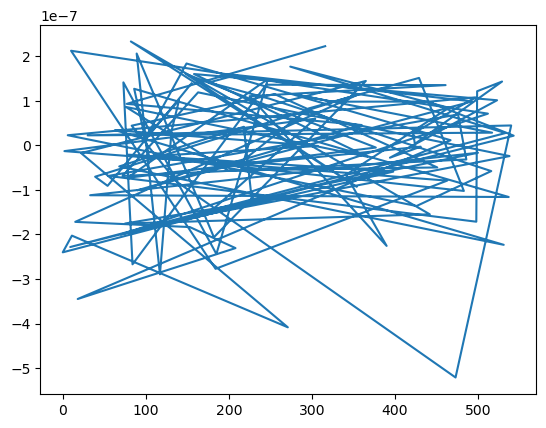

In [42]:
plt.plot(residuals)

# iii. Homoscedasticity

The spread of the residuals should be equal.

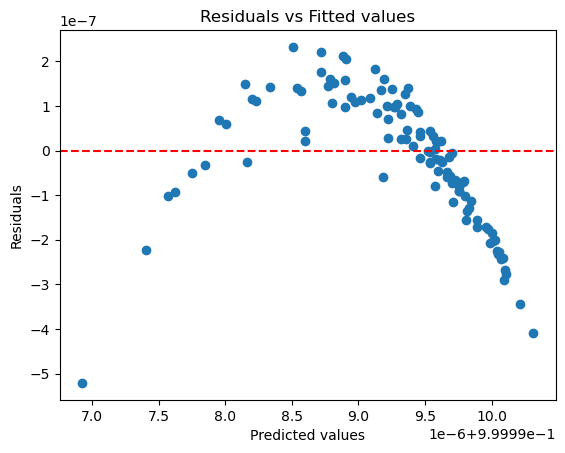

In [43]:
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# iv. Normality of Residuals

The residuals should be normally distributed.

C:\Users\Kavya Anil\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


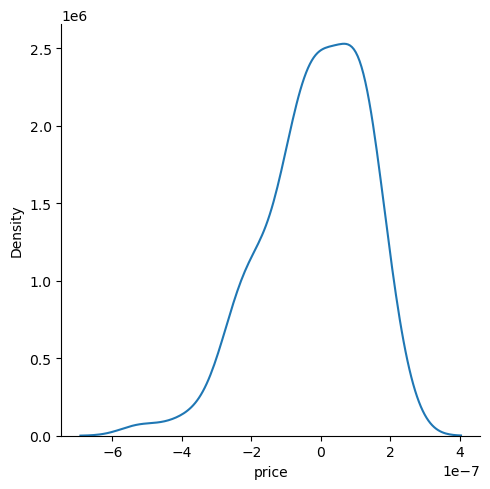

In [44]:
sns.displot(residuals,kind='kde')

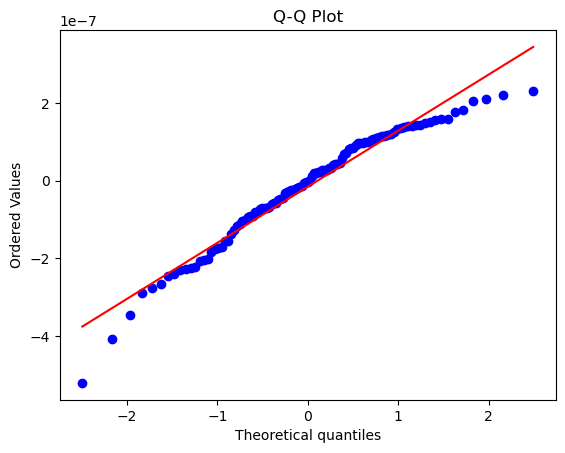

In [45]:
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

# v. No Multicollinearity

There should be no correlation in between the input variables; they should be independent of each other.

<Axes: >

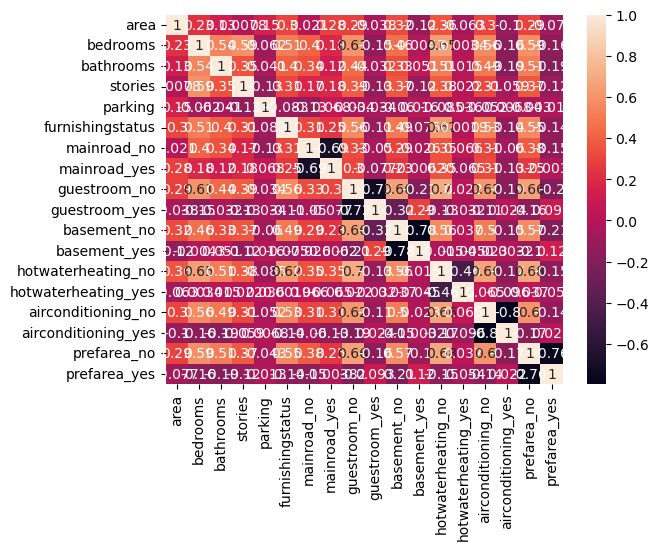

In [46]:
sns.heatmap(df.iloc[:,1:19].corr(), annot=True)

# 2. Decision Tree Regressor

In [47]:
dt = DecisionTreeRegressor(max_depth= 20, min_samples_split= 2)

In [48]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=20)

In [49]:
y_pred = dt.predict(X_test)

In [50]:
mse_dt = mean_squared_error(y_test, y_pred)
r2_dt = r2_score(y_test, y_pred)
mae_dt = mean_absolute_error(y_test, y_pred)
rmse_dt = np.sqrt(mse_dt)
print("Mean Absolute Error:", mae_dt)
print("Mean Squared Error:", mse_dt)
print("Root Mean Squared Error:", rmse_dt)
print("R2 Score:",r2_dt)

Mean Absolute Error: 2.5577151121828987e-08
Mean Squared Error: 1.345710809191629e-15
Root Mean Squared Error: 3.668393121233913e-08
R2 Score: 0.9966707072307013


# Hyperparameter tuning (GridSearchCV)

In [51]:
params = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(dt, params, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(max_depth=20),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10]})

In [52]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [53]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R2 Score:",r2)

Mean Absolute Error: 2.5143851737688685e-08
Mean Squared Error: 2.936054237212515e-15
Root Mean Squared Error: 5.418536921727594e-08
R2 Score: 0.9927361925939406


In [54]:
grid_search.best_params_

{'max_depth': 30, 'min_samples_split': 2}

In [55]:
grid_search.best_score_

0.9757535682776508

# 3. Random Forest Regressor

In [56]:
rf = RandomForestRegressor(max_depth= 20, min_samples_split= 2, n_estimators= 50)

In [57]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=50)

In [58]:
y_pred = rf.predict(X_test)

In [59]:
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf= r2_score(y_test, y_pred)
mae_rf = mean_absolute_error(y_test, y_pred)
rmse_rf = np.sqrt(mse_rf)
print("Mean Absolute Error:", mae_rf)
print("Mean Squared Error:", mse_rf)
print("Root Mean Squared Error:", rmse_rf)
print("R2 Score:",r2_rf)

Mean Absolute Error: 1.2533273992547402e-08
Mean Squared Error: 1.3753021089633481e-15
Root Mean Squared Error: 3.708506584817328e-08
R2 Score: 0.9965974982621092


# Hyperparameter tuning (GridSearchCV)

In [60]:
params = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(rf, params, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=20, n_estimators=50),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]})

In [61]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [62]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R2 Score:",r2)

Mean Absolute Error: 1.4355394373731474e-08
Mean Squared Error: 1.9994978388517102e-15
Root Mean Squared Error: 4.4715744865222926e-08
R2 Score: 0.9950532360655435


In [63]:
grid_search.best_params_

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 10}

In [64]:
grid_search.best_score_

0.9791687020611277

# 4. Support Vector Regressor (SVR)

In [65]:
svr = SVR(C= 0.1, epsilon=0.1, kernel= 'linear')

In [66]:
svr.fit(X_train, y_train)

SVR(C=0.1, kernel='linear')

In [67]:
y_pred = svr.predict(X_test)

In [68]:
mse_svr= mean_squared_error(y_test, y_pred)
r2_svr= r2_score(y_test, y_pred)
mae_svr = mean_absolute_error(y_test, y_pred)
rmse_svr = np.sqrt(mse_svr)
print("Mean Absolute Error:", mae_svr)
print("Mean Squared Error:", mse_svr)
print("Root Mean Squared Error:", rmse_svr)
print("R2 Score:",r2_svr)

Mean Absolute Error: 2.722984207980005e-06
Mean Squared Error: 7.805086173249241e-12
Root Mean Squared Error: 2.79375843144128e-06
R2 Score: -18.309807711183694


# Hyperparameter tuning (GridSearchCV)

In [69]:
params = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5]
}
grid_search = GridSearchCV(svr, params, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(C=0.1, kernel='linear'),
             param_grid={'C': [0.1, 1, 10], 'epsilon': [0.1, 0.2, 0.5],
                         'kernel': ['linear', 'poly', 'rbf']})

In [70]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [71]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R2 Score:",r2)

Mean Absolute Error: 2.722984207980005e-06
Mean Squared Error: 7.805086173249241e-12
Root Mean Squared Error: 2.79375843144128e-06
R2 Score: -18.309807711183694


In [72]:
grid_search.best_params_

{'C': 0.1, 'epsilon': 0.1, 'kernel': 'linear'}

In [73]:
grid_search.best_score_

-18.136941583984406

# 5. K-Nearest Neighbors Regressor

In [74]:
knn = KNeighborsRegressor(n_neighbors= 3, weights= 'distance')

In [75]:
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3, weights='distance')

In [76]:
y_pred = knn.predict(X_test)

In [77]:
mse_knn = mean_squared_error(y_test, y_pred)
r2_knn = r2_score(y_test, y_pred)
mae_knn = mean_absolute_error(y_test, y_pred)
rmse_knn = np.sqrt(mse_knn)
print("Mean Absolute Error:", mae_knn)
print("Mean Squared Error:", mse_knn)
print("Root Mean Squared Error:", rmse_knn)
print("R2 Score:",r2_lr)

Mean Absolute Error: 3.722408071894409e-09
Mean Squared Error: 1.1987442593584495e-16
Root Mean Squared Error: 1.0948718004216062e-08
R2 Score: 0.9475503332966599


# Hyperparameter tuning (GridSearchCV)

In [78]:
params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}
grid_search = GridSearchCV(knn, params, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=KNeighborsRegressor(n_neighbors=3, weights='distance'),
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']})

In [79]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [80]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R2 Score:",r2)

Mean Absolute Error: 3.722408071894409e-09
Mean Squared Error: 1.1987442593584495e-16
Root Mean Squared Error: 1.0948718004216062e-08
R2 Score: 0.9997034302936663


In [81]:
grid_search.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [82]:
grid_search.best_score_

0.9707806510819068

# Model Comparison

In [83]:
metrics = {
    "Model": ["Linear Regression", "Decision Tree", "Random Forest", "K-Nearest Neighbors", "Support Vector Regression"],
    "MAE": [mae_lr, mae_dt, mae_rf, mae_knn, mae_svr],
    "MSE": [mse_lr, mse_dt, mse_rf, mse_knn, mse_svr],
    "RMSE": [rmse_lr, rmse_dt, rmse_rf, rmse_knn, rmse_svr],
    "R2": [r2_lr, r2_dt, r2_rf, r2_knn, r2_svr]
}

df_metric = pd.DataFrame(metrics)
print(df_metric)

                       Model           MAE           MSE          RMSE  \
0          Linear Regression  1.156827e-07  2.120032e-14  1.456033e-07   
1              Decision Tree  2.557715e-08  1.345711e-15  3.668393e-08   
2              Random Forest  1.253327e-08  1.375302e-15  3.708507e-08   
3        K-Nearest Neighbors  3.722408e-09  1.198744e-16  1.094872e-08   
4  Support Vector Regression  2.722984e-06  7.805086e-12  2.793758e-06   

          R2  
0   0.947550  
1   0.996671  
2   0.996597  
3   0.999703  
4 -18.309808  


Hence, we can see, with respect to R2 score, K-Nearest neighbors performs the best for this dataset. Thus, that will be implemented in the pipeline.

# Implementation using pipeline:

Now, the model is implemented using a pipeline so the pipeline can be used in the Flask App.

# Train test split

The original data (saved in df_copy) is split for the pipeline.

In [84]:
X=df_copy.drop(columns=['price'])
y=df_copy['price']

In [85]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [86]:
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
46,6000,3,2,4,yes,no,no,no,yes,1,no,furnished
93,7200,3,2,1,yes,no,yes,no,yes,3,no,semi-furnished
335,3816,2,1,1,yes,no,yes,no,yes,2,no,furnished
412,2610,3,1,2,yes,no,yes,no,no,0,yes,unfurnished
471,3750,3,1,2,yes,no,no,no,no,0,no,unfurnished
...,...,...,...,...,...,...,...,...,...,...,...,...
71,6000,4,2,4,yes,no,no,no,yes,0,no,unfurnished
106,5450,4,2,1,yes,no,yes,no,yes,0,yes,semi-furnished
270,4500,3,2,3,yes,no,no,yes,no,1,no,furnished
435,4040,2,1,1,yes,no,no,no,no,0,no,unfurnished


In [87]:
y_train

46     7525000
93     6300000
335    3920000
412    3430000
471    3010000
        ...   
71     6755000
106    6160000
270    4340000
435    3290000
102    6195000
Name: price, Length: 436, dtype: int64

In [88]:
X_test

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
316,5900,4,2,2,no,no,yes,no,no,1,no,unfurnished
77,6500,3,2,3,yes,no,no,no,yes,0,yes,furnished
360,4040,2,1,1,yes,no,no,no,no,0,no,semi-furnished
90,5000,3,1,2,yes,no,no,no,yes,0,no,semi-furnished
493,3960,3,1,1,yes,no,no,no,no,0,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
15,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished
357,6930,4,1,2,no,no,no,no,no,1,no,furnished
39,6000,4,2,4,yes,no,no,no,yes,1,no,semi-furnished
54,6000,3,2,2,yes,yes,no,no,yes,1,no,semi-furnished


In [89]:
y_test

316    4060000
77     6650000
360    3710000
90     6440000
493    2800000
        ...   
15     9100000
357    3773000
39     7910000
54     7350000
155    5530000
Name: price, Length: 109, dtype: int64

The dependent variables and the independent variable are taken into different dataframes and the data is split for training and testing.

# Encoding categorical values

In [90]:
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
46,6000,3,2,4,yes,no,no,no,yes,1,no,furnished
93,7200,3,2,1,yes,no,yes,no,yes,3,no,semi-furnished
335,3816,2,1,1,yes,no,yes,no,yes,2,no,furnished
412,2610,3,1,2,yes,no,yes,no,no,0,yes,unfurnished
471,3750,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [91]:
trf1 = ColumnTransformer([
    ('ohe',OneHotEncoder(sparse_output=False,handle_unknown='ignore'),[4,5,6,7,8,10]),
    ('ordinal',OrdinalEncoder(),[11])
],remainder='passthrough')

# Scaling

In [92]:
trf2 = ColumnTransformer([
    ('scale',Normalizer(),slice(0,17))
])

# Model- K-Nearest Neighbors Regressor

In [93]:
knn = KNeighborsRegressor()

# Pipeline

In [94]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('knn',knn)
])

# Train

In [95]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [4, 5, 6, 7, 8, 10]),
                                                 ('ordinal', OrdinalEncoder(),
                                                  [11])])),
                ('trf2',
                 ColumnTransformer(transformers=[('scale', Normalizer(),
                                                  slice(0, 17, None))])),
                ('knn', KNeighborsRegressor())])

# Prediction

In [96]:
y_pred = pipe.predict(X_test)

# Export to a pickle file

In [97]:
pickle.dump(pipe,open('house_price_pickle.pkl','wb'))

A pickle file is a serialized file that stores Python objects like ML trained models in a format that can be saved and later restored for reuse.

# Demonstration of opening pickle file for prediction

The pickle file is opened and test data is passed so that prediction can be performed.

In [98]:
pipeline = pickle.load(open('house_price_pickle.pkl','rb'))

In [99]:
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
46,6000,3,2,4,yes,no,no,no,yes,1,no,furnished
93,7200,3,2,1,yes,no,yes,no,yes,3,no,semi-furnished
335,3816,2,1,1,yes,no,yes,no,yes,2,no,furnished
412,2610,3,1,2,yes,no,yes,no,no,0,yes,unfurnished
471,3750,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [100]:
test_data = np.array([12345,3,3, 1,'yes','no','no','yes','yes',1,'yes','furnished'],dtype=object).reshape(1,12)

In [101]:
pipeline.predict(test_data)

C:\Users\Kavya Anil\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
C:\Users\Kavya Anil\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


array([6956600.])

This is the predicted house price for the given test data.